<a href="https://colab.research.google.com/github/VS-Coder/CheatSheets/blob/master/Michael_Davis_LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
# Import statements.
import pandas as pd
import numpy as np
import scipy.stats as ttest_ind, normaltest

# Assigning the column names to for the data file.
col_heads = ['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa']



In [0]:
# Loading the data file and assigning the column names.
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

In [0]:
# Loading the data to a Pandas DataFrame.
vt_df = pd.read_csv('house-votes-84.data',
                       header=None,
                       names=col_heads,
                       na_values="?")

In [0]:
# Changing the vote values to 1s and 0s. Recoding the values.
vt_df = vt_df.replace({'y':1, 'n':0})

In [0]:
import scipy.stats as stats

In [0]:
# function for the Confidence Interval
def con_int(dt, confidence=0.95):
    """
    Calculate a confidence interval around a sample mean for given data.
    Using t-distribution and two-tailed test, default 95% confidence. 

    Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval

    Returns:
    tuple of (mean, lower bound, upper bound)
    """
    newdata = np.array(dt)
    newmean = np.mean(dt)
    n=len(dt)
    std_err = np.std(dt, ddof=1)/np.sqrt(n)
    margin_err = std_err*stats.t.ppf((1 + confidence)/2, n-1)
    return (newmean, newmean - margin_err, newmean + margin_err)

In [13]:
# Displaying the dataframe for reference.
vt_df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [18]:
reps = vt_df[vt_df['party']== 'republican']
dems = vt_df[vt_df['party']== 'democrat']

# Cleaning the columns of the NaN values.
col_r = reps['handicapped-infants']
col_d = dems['handicapped-infants']

# First reps col
np.isnan(col_r)
r_col = col_r[~np.isnan(col_r)]

# Next dems col
np.isnan(col_d)
d_col = col_d[~np.isnan(col_d)]
print(r_col.value_counts())
print(d_col.value_counts())

0.0    134
1.0     31
Name: handicapped-infants, dtype: int64
1.0    156
0.0    102
Name: handicapped-infants, dtype: int64


In [28]:
# Display the Confidence Interval for rep votes
# for the handicapped-infants.

r_CI = con_int(r_col)
r_CI

(0.18787878787878787, 0.12765166444807918, 0.24810591130949655)

In [29]:
# Display the Confidence Interval for dem votes
# for the handicapped-infants.

d_CI = con_int(d_col)
d_CI

(0.6046511627906976, 0.5445926997425515, 0.6647096258388437)

# ***Graph the confidence intervals.***

In [25]:
# import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


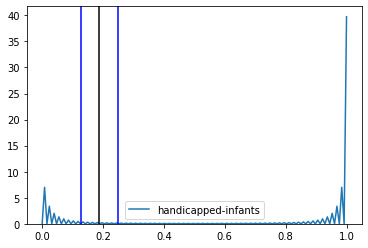

In [30]:
sns.kdeplot(r_col)
plt.axvline(x=r_CI[1], color='blue');
plt.axvline(x=r_CI[2], color='blue');
plt.axvline(x=r_CI[0], color='black');

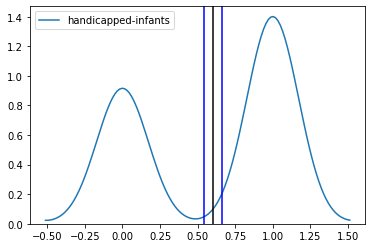

In [31]:
sns.kdeplot(d_col)
plt.axvline(x=d_CI[1], color='blue');
plt.axvline(x=d_CI[2], color='blue');
plt.axvline(x=d_CI[0], color='black');

The distribution of the data used (handicaped-infants) was mainly favored by the republicans. There was some support fro the bill from democrats, but as a whole, they rejected the bill. The repoublicans were nearly fully in support of this bill.

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy

In [0]:
# URL for the titanic data

url = 'https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv'

In [0]:
titanic = pd.read_csv(url)

In [0]:
titanic['cabin_class'] = titanic['Pclass'].map({1: 'first', 2: 'second', 3: 'third'})


In [36]:
titanic.sample(5)

,Survived,Pclass,Sex,Age,Fare,Embarked,cabin_class
39,1,2,female,29.0,26.0000,Southampton,second
259,1,2,female,22.0,29.0000,Southampton,second
337,0,3,male,29.0,7.8750,Southampton,third
144,0,3,male,9.0,31.3875,Southampton,third
393,0,3,male,21.0,8.0500,Southampton,third


In [38]:
# Making a crosstab from the sex and cabin_class columns.
cross_tab = pd.crosstab(titanic['Sex'], titanic['cabin_class'], margins=True)
cross_tab

cabin_class,first,second,third,All
Sex,,,,
female,83,74,102,259
male,101,99,253,453
All,184,173,355,712


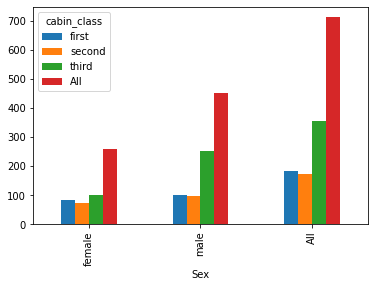

In [40]:
cross_tab.plot(kind='bar');

In [44]:
row_sums = cross_tab.iloc[:2, 2].values
row_sums

array([102, 253])

In [45]:
col_sums = cross_tab.iloc[2, :3].values
col_sums

array([184, 173, 355])

In [47]:
total = cross_tab.loc['All', 'All']
total

712

In [48]:
expected = []
for i in range(len(row_sums)):
  expected_row=[]
  for column in col_sums:
    expected_val = column*row_sums[i]/total
    expected_row.append(expected_val)
  expected.append(expected_row)
pd.DataFrame(expected)

,0,1,2
0,26.359551,24.783708,50.856742
1,65.382022,61.473315,126.144663


In [49]:
obs = pd.crosstab(titanic['Sex'], titanic['cabin_class']).values
pd.DataFrame(obs)

,0,1,2
0,83,74,102
1,101,99,253


In [50]:
chi_squared = ((obs - expected)**2/(expected)).sum()
chi_squared

440.7555188746967

In [51]:
deg_of_freedom = (len(row_sums)-1)*(len(col_sums)-1)
deg_of_freedom

2

# **Using SciPy**

In [52]:
chi_squared

440.7555188746967

In [53]:
stats.chi2_contingency(obs)

(18.08484036123574,
 0.00011828422058509222,
 2,
 array([[ 66.93258427,  62.93117978, 129.13623596],
        [117.06741573, 110.06882022, 225.86376404]]))

In [54]:
print('stat value', stats.chi2_contingency(obs)[0])
print('pvalue', stats.chi2_contingency(obs)[1])
print('dof', stats.chi2_contingency(obs)[2])
pd.DataFrame(stats.chi2_contingency(obs)[3])

stat value 18.08484036123574
pvalue 0.00011828422058509222
dof 2


,0,1,2
0,66.932584,62.93118,129.136236
1,117.067416,110.06882,225.863764


## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)